In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("MTQ7.csv")
df.head()

,ID,X1,X2
0,A1,2,10
1,A2,8,4
2,A3,5,8
3,A4,6,4
4,A5,1,2


Text(0, 0.5, 'X2')

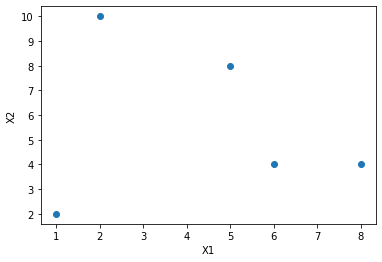

In [4]:
plt.scatter(df.X1,df['X2'])
plt.xlabel('X1')
plt.ylabel('X2')

In [5]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['X1','X2']])
y_predicted

array([0, 1, 0, 1, 1], dtype=int32)

In [6]:
df['cluster']=y_predicted
df.head()

,ID,X1,X2,cluster
0,A1,2,10,0
1,A2,8,4,1
2,A3,5,8,0
3,A4,6,4,1
4,A5,1,2,1


In [7]:
km.cluster_centers_

array([[3.5       , 9.        ],
       [5.        , 3.33333333]])

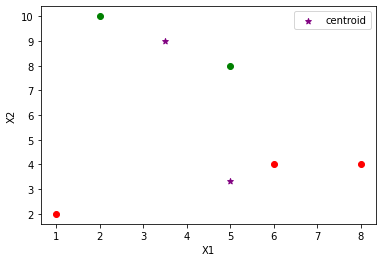

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.X1,df1['X2'],color='green')
plt.scatter(df2.X1,df2['X2'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

In [9]:
# Using the elbow method to find the optimal number of clusters
wcss = []
k_rng = range(1,6)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['X1','X2']])
    wcss.append(km.inertia_)

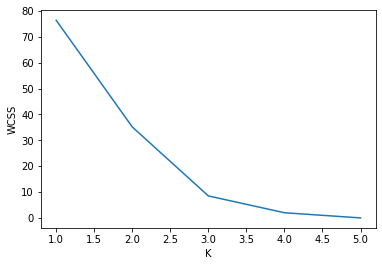

In [11]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng,wcss)